In [1]:
import sys
sys.path.insert(1, '/content/drive/MyDrive/COVID-19-pooling') 

In [2]:
! pip install mip

     |████████████████████████████████| 48.0MB 90kB/s 


In [3]:
from test import compare_truth_and_estimates
import matplotlib.pyplot as plt
from util import simulate_x
import numpy as np

In [4]:
num_trials = 50 # this is the number of infection vectors we're going to simulate 
num_M = 50 

# Get Started
In this notebook, we will investigate for a given membership matrix, whether there is a correlation between the performance on two sets of infection vectors simulated under the same population infection rate. 

Let's first generate two sets of infection vectors. 



In [6]:
# feel free to modify this cell
n = 384
f = 9/384

In [7]:
xs_file1 = './data/n%s-f%.4f-numTrials%s.csv' % (n, f, num_trials)
xs_file2 = "./data/n%s-f%.4f-numTrials%s-test.csv" % (n, f, num_trials) 

simulate_x(n, f, num_trials, xs_file1) 
simulate_x(n, f, num_trials, xs_file2) 

On average, 8.42 positives in each trail.
On average, 9.66 positives in each trail.


# Compare Performance

In [8]:
T = 48 
m = 6

In [10]:
from membership_matrix import generate_doubly_regular_col

set1_accuracy = [] 
set2_accuracy = [] 

for i in range(num_M): 
    print("Testing Matrix #%s" % (i + 1))
    M = generate_doubly_regular_col((T, n), m) 
      
    set1_info = compare_truth_and_estimates(M, xs_file1, f) 
    set1_accuracy.append(np.average(set1_info["accuracy"]))
      
    set2_info = compare_truth_and_estimates(M, xs_file2, f) 
    set2_accuracy.append(np.average(set2_info["accuracy"]))

Testing Matrix #1
Testing Matrix #2
Testing Matrix #3
Testing Matrix #4
Testing Matrix #5
Testing Matrix #6
Testing Matrix #7
Testing Matrix #8
Testing Matrix #9
Testing Matrix #10
Testing Matrix #11
Testing Matrix #12
Testing Matrix #13
Testing Matrix #14
Testing Matrix #15
Testing Matrix #16
Testing Matrix #17
Testing Matrix #18
Testing Matrix #19
Testing Matrix #20
Testing Matrix #21
Testing Matrix #22
Testing Matrix #23
Testing Matrix #24
Testing Matrix #25
Testing Matrix #26
Testing Matrix #27
Testing Matrix #28
Testing Matrix #29
Testing Matrix #30
Testing Matrix #31
Testing Matrix #32
Testing Matrix #33
Testing Matrix #34
Testing Matrix #35
Testing Matrix #36
Testing Matrix #37
Testing Matrix #38
Testing Matrix #39
Testing Matrix #40
Testing Matrix #41
Testing Matrix #42
Testing Matrix #43
Testing Matrix #44
Testing Matrix #45
Testing Matrix #46
Testing Matrix #47
Testing Matrix #48
Testing Matrix #49
Testing Matrix #50


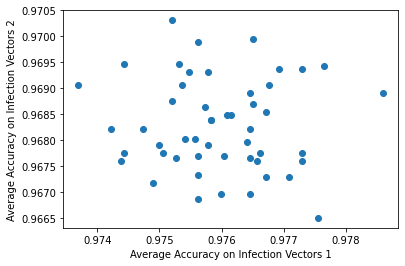

Correlation: -0.04924001290549167


In [16]:
# plot 
plt.scatter(set1_accuracy, set2_accuracy)
plt.xlabel('Average Accuracy on Infection Vectors 1')
plt.ylabel('Average Accuracy on Infection Vectors 2')
plt.savefig("good-matrices-analysis-numTrials%s-numM%s.png" % (num_trials, num_M))
plt.show() 

corr = np.corrcoef(set1_accuracy, set2_accuracy)[0][1]
print("Correlation: %s" % corr)